In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/PROJECT/Dataset/trial/karimnagar_T.csv",index_col="Date")

In [ ]:
data.head()

,Unnamed: 0,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,heat_w
Date,,,,,,,,,
1/1/2018,0,0.0,13.6,33.2,32.0,47.7,0.0,2.9,F
1/2/2018,1,0.0,13.3,34.3,37.1,45.7,0.0,2.2,F
1/3/2018,2,0.0,13.0,33.2,37.7,55.2,0.0,3.5,F
1/4/2018,3,0.0,11.8,33.4,33.5,61.0,0.0,0.8,F
1/5/2018,4,0.0,12.3,32.9,31.6,53.2,0.0,2.6,F


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(data['heat_w'])
# Fit and transform the categorical feature using LabelEncoder
data['heat_w'] = le.fit_transform(data['heat_w'])
print(data['heat_w'])

Date
1/1/2018     F
1/2/2018     F
1/3/2018     F
1/4/2018     F
1/5/2018     F
            ..
9/26/2022    F
9/27/2022    F
9/28/2022    F
9/29/2022    F
9/30/2022    F
Name: heat_w, Length: 1734, dtype: object
Date
1/1/2018     0
1/2/2018     0
1/3/2018     0
1/4/2018     0
1/5/2018     0
            ..
9/26/2022    0
9/27/2022    0
9/28/2022    0
9/29/2022    0
9/30/2022    0
Name: heat_w, Length: 1734, dtype: int64


In [ ]:
#data = data.replace(to_replace=['T', 'F'], value=[1, 0])

In [ ]:
data.head()

,Unnamed: 0,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,heat_w
Date,,,,,,,,,
1/1/2018,0,0.0,13.6,33.2,32.0,47.7,0.0,2.9,0
1/2/2018,1,0.0,13.3,34.3,37.1,45.7,0.0,2.2,0
1/3/2018,2,0.0,13.0,33.2,37.7,55.2,0.0,3.5,0
1/4/2018,3,0.0,11.8,33.4,33.5,61.0,0.0,0.8,0
1/5/2018,4,0.0,12.3,32.9,31.6,53.2,0.0,2.6,0


In [ ]:
print('Number of Normal days: ', sum(data.heat_w ==0))
print('Number of Heat wave days: ', sum(data.heat_w ==1))

Number of Normal days:  1602
Number of Heat wave days:  132


In [ ]:
df=data
#data=data.drop(['heat_w'], axis = 1)
data=data.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df.head()
#data.head()

,Unnamed: 0,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,heat_w
Date,,,,,,,,,
1/1/2018,0,0.0,13.6,33.2,32.0,47.7,0.0,2.9,0
1/2/2018,1,0.0,13.3,34.3,37.1,45.7,0.0,2.2,0
1/3/2018,2,0.0,13.0,33.2,37.7,55.2,0.0,3.5,0
1/4/2018,3,0.0,11.8,33.4,33.5,61.0,0.0,0.8,0
1/5/2018,4,0.0,12.3,32.9,31.6,53.2,0.0,2.6,0


In [ ]:
#from sklearn.preprocessing import Normalizer
#norm= Normalizer()
#data= norm.fit_transform(data)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#data = scaler.fit_transform(data.reshape(-1,1))

In [ ]:
data

,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,heat_w
Date,,,,,,,,
1/1/2018,0.0,13.6,33.2,32.0,47.7,0.0,2.9,0
1/2/2018,0.0,13.3,34.3,37.1,45.7,0.0,2.2,0
1/3/2018,0.0,13.0,33.2,37.7,55.2,0.0,3.5,0
1/4/2018,0.0,11.8,33.4,33.5,61.0,0.0,0.8,0
1/5/2018,0.0,12.3,32.9,31.6,53.2,0.0,2.6,0
...,...,...,...,...,...,...,...,...
9/26/2022,0.0,24.1,32.8,58.4,98.6,0.0,7.8,0
9/27/2022,0.0,24.1,33.3,62.5,94.3,0.0,10.4,0
9/28/2022,0.0,24.8,32.3,69.0,98.0,0.0,6.5,0


In [ ]:
#from sklearn.preprocessing import Normalizer
#norm = Normalizer()
#data['temp_min'] = norm.fit_transform(data['temp_min'].values.reshape(-1,1))
#data['cumm_rainfall'] = norm.fit_transform(data['cumm_rainfall'].values.reshape(-1,1))
#data['temp_max'] = norm.fit_transform(data['temp_max'].values.reshape(-1,1))
#data['humidity_min'] = norm.fit_transform(data['humidity_min'].values.reshape(-1,1))
#data['humidity_max'] = norm.fit_transform(data['humidity_max'].values.reshape(-1,1))
#data['wind_speed_min'] = norm.fit_transform(data['wind_speed_min'].values.reshape(-1,1))
#data['wind_speed_max'] = norm.fit_transform(data['wind_speed_max'].values.reshape(-1,1))

In [ ]:
data

,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,heat_w
Date,,,,,,,,
1/1/2018,0.0,13.6,33.2,32.0,47.7,0.0,2.9,0
1/2/2018,0.0,13.3,34.3,37.1,45.7,0.0,2.2,0
1/3/2018,0.0,13.0,33.2,37.7,55.2,0.0,3.5,0
1/4/2018,0.0,11.8,33.4,33.5,61.0,0.0,0.8,0
1/5/2018,0.0,12.3,32.9,31.6,53.2,0.0,2.6,0
...,...,...,...,...,...,...,...,...
9/26/2022,0.0,24.1,32.8,58.4,98.6,0.0,7.8,0
9/27/2022,0.0,24.1,33.3,62.5,94.3,0.0,10.4,0
9/28/2022,0.0,24.8,32.3,69.0,98.0,0.0,6.5,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['temp_min'] = scaler.fit_transform(data['temp_min'].values.reshape(-1,1))
data['cumm_rainfall'] = scaler.fit_transform(data['cumm_rainfall'].values.reshape(-1,1))
data['temp_max'] = scaler.fit_transform(data['temp_max'].values.reshape(-1,1))
data['humidity_min'] = scaler.fit_transform(data['humidity_min'].values.reshape(-1,1))
data['humidity_max'] = scaler.fit_transform(data['humidity_max'].values.reshape(-1,1))
data['wind_speed_min'] = scaler.fit_transform(data['wind_speed_min'].values.reshape(-1,1))
data['wind_speed_max'] = scaler.fit_transform(data['wind_speed_max'].values.reshape(-1,1))
#data['heat_w'] = scaler.fit_transform(data['heat_w'].values.reshape(-1,1))

In [ ]:
data

,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,heat_w
Date,,,,,,,,
1/1/2018,0.0,13.6,33.2,32.0,47.7,0.0,2.9,0
1/2/2018,0.0,13.3,34.3,37.1,45.7,0.0,2.2,0
1/3/2018,0.0,13.0,33.2,37.7,55.2,0.0,3.5,0
1/4/2018,0.0,11.8,33.4,33.5,61.0,0.0,0.8,0
1/5/2018,0.0,12.3,32.9,31.6,53.2,0.0,2.6,0
...,...,...,...,...,...,...,...,...
9/26/2022,0.0,24.1,32.8,58.4,98.6,0.0,7.8,0
9/27/2022,0.0,24.1,33.3,62.5,94.3,0.0,10.4,0
9/28/2022,0.0,24.8,32.3,69.0,98.0,0.0,6.5,0


In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(1)
#data_train, data_test = train_test_split(data, test_size=0.2)
data_train=data
data_test=data
print(data_test.shape)
print(data_train.shape)

(1734, 8)
(1734, 8)


In [ ]:
#data_test = data_test.append(data_train[data_train.heat_w == 1])
#data_train = data_train[data_train.heat_w == 0]
#print(data_test.shape)
#print(data_train.shape)

In [ ]:
data_test.head(10)

,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,heat_w
Date,,,,,,,,
1/1/2018,-0.287612,-2.141206,-0.225574,-0.733688,-2.243698,-0.461846,-0.383520,0
1/2/2018,-0.287612,-2.209928,0.034964,-0.474309,-2.367045,-0.461846,-0.464172,0
1/3/2018,-0.287612,-2.278650,-0.225574,-0.443794,-1.781150,-0.461846,-0.314390,0
1/4/2018,-0.287612,-2.553538,-0.178203,-0.657400,-1.423446,-0.461846,-0.625477,0
1/5/2018,-0.287612,-2.439001,-0.296629,-0.754032,-1.904496,-0.461846,-0.418085,0
1/6/2018,-0.287612,-2.576446,-0.320315,-0.891350,-1.990839,-0.461846,-0.325911,0
1/7/2018,-0.287612,-2.187020,-0.107148,-0.728603,-2.237531,-0.461846,-0.210694,0
1/8/2018,-0.287612,-2.324465,0.006541,-0.611627,-1.879827,-0.461846,-0.613955,0
1/9/2018,-0.287612,-2.324465,-0.320315,-0.514996,-1.700975,-0.461846,-0.291346,0


In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train = data_train.drop(['heat_w'], axis = 1).values
#X_train = data_train
X_test = data_test.drop(['heat_w'], axis = 1).values
#X_test = data_test
Y_test = data_test['heat_w']

In [ ]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline

# configure our pipeline
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

In [ ]:
pipeline.fit(X_train);


In [ ]:
X_train

array([[ 0. , 13.6, 33.2, ..., 47.7,  0. ,  2.9],
       [ 0. , 13.3, 34.3, ..., 45.7,  0. ,  2.2],
       [ 0. , 13. , 33.2, ..., 55.2,  0. ,  3.5],
       ...,
       [ 0. , 24.8, 32.3, ..., 98. ,  0. ,  6.5],
       [23.9, 24. , 32.1, ..., 98.9,  0. ,  7.1],
       [ 5.6, 23.2, 32.6, ..., 98.7,  0. , 10.2]])

In [ ]:
#Build the model
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import optimizers

In [ ]:
nb_epoch = 50
batch_size = 128
input_dim = X_train.shape[1] #num of columns,
encoding_dim = 18
hidden_dim1 = 10 #int(encoding_dim / 2) #i.e. 7
hidden_dim2 = 6
learning_rate = 1e-7

In [ ]:
input_size = input_dim
hidden_sizes = [128,256,128]
input_layer = Input(shape=(input_size,))
encoder = Dense(hidden_sizes[0], activation = "relu")(input_layer)
encoder = Dense(hidden_sizes[1], activation = "relu")(encoder)
decoder = Dense(hidden_sizes[2], activation = 'relu')(encoder)
decoder = Dense(input_size)(decoder)
ae = Model(inputs=input_layer, outputs=decoder)
print(ae.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 7)                 903       
                                                                 
Total params: 67,847
Trainable params: 67,847
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Compile the model
optimizer = optimizers.Adam(lr=0.0005)
ae.compile(optimizer = optimizer, loss='mean_squared_error')

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
!pwd

/content


In [ ]:
tensor_board = TensorBoard(log_dir='./logs/run1/',write_graph=True, write_images=False)
model_file = "model_ae.h5"
checkpoint = ModelCheckpoint(model_file, monitor='loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
history = ae.fit(x=X_train, y=X_train,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1,
                          callbacks=[checkpoint, tensor_board]).history

Epoch 1/50
13/14 [==========================>...] - ETA: 0s - loss: 722.7826
Epoch 1: loss improved from inf to 702.98761, saving model to model_ae.h5
14/14 [==============================] - 2s 88ms/step - loss: 702.9876 - val_loss: 146.9829
Epoch 2/50
 8/14 [================>.............] - ETA: 0s - loss: 115.5520
Epoch 2: loss improved from 702.98761 to 106.75696, saving model to model_ae.h5
14/14 [==============================] - 0s 17ms/step - loss: 106.7570 - val_loss: 69.9795
Epoch 3/50
 9/14 [==================>...........] - ETA: 0s - loss: 61.5773
Epoch 3: loss improved from 106.75696 to 55.76143, saving model to model_ae.h5
14/14 [==============================] - 0s 16ms/step - loss: 55.7614 - val_loss: 36.3209
Epoch 4/50
 9/14 [==================>...........] - ETA: 0s - loss: 31.7031
Epoch 4: loss improved from 55.76143 to 28.27936, saving model to model_ae.h5
14/14 [==============================] - 0s 16ms/step - loss: 28.2794 - val_loss: 18.1567
Epoch 5/50
13/14 [==

In [ ]:
#num_epoch = 30
#batch_size = 64
#ae.fit(X_train, X_train, epochs=num_epoch, batch_size=batch_size, shuffle=True, validation_data=(X_test, X_test), verbose=1, callbacks=[checkpoint, tensor_board])


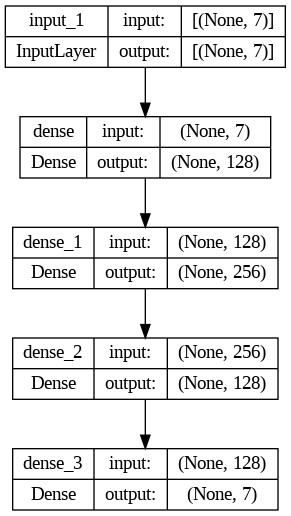

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(ae, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
opt = keras.optimizers.legacy.SGD(lr=0.00005,decay=1e-6)
ae.compile(opt,loss="mse")

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#Reconstruction error
recon = ae.predict(X_test)
recon_error = np.mean(np.power(X_test-recon,2), axis=1)
#print(recon[1:10,:])
print(recon.shape)

55/55 [==============================] - 0s 4ms/step
(1734, 7)


In [ ]:
main_df = pd.DataFrame(recon)

In [ ]:
main_df

,0,1,2,3,4,5,6
0,0.098199,13.236012,33.278736,32.161621,47.458439,0.201475,3.102211
1,-0.174751,13.113267,34.418644,36.897186,45.622044,0.161655,2.292425
2,0.158216,12.839692,33.075054,37.697311,55.020267,0.254165,3.390382
3,0.309447,11.571054,33.050343,33.337685,60.980183,0.157566,0.905933
4,0.173079,12.066466,32.795536,31.544041,53.063431,0.193994,2.603945
...,...,...,...,...,...,...,...
1729,0.041851,24.013174,32.878819,58.236794,98.595406,-0.036759,7.790390
1730,0.013751,24.001575,33.201584,62.389202,94.224541,0.017067,10.464435
1731,-0.089603,24.704252,32.357338,69.137154,97.941597,-0.180411,6.523023
1732,23.979668,23.708380,32.173790,70.239922,98.967567,0.011078,7.178368


In [ ]:
data

,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,heat_w
Date,,,,,,,,
1/1/2018,0.0,13.6,33.2,32.0,47.7,0.0,2.9,0
1/2/2018,0.0,13.3,34.3,37.1,45.7,0.0,2.2,0
1/3/2018,0.0,13.0,33.2,37.7,55.2,0.0,3.5,0
1/4/2018,0.0,11.8,33.4,33.5,61.0,0.0,0.8,0
1/5/2018,0.0,12.3,32.9,31.6,53.2,0.0,2.6,0
...,...,...,...,...,...,...,...,...
9/26/2022,0.0,24.1,32.8,58.4,98.6,0.0,7.8,0
9/27/2022,0.0,24.1,33.3,62.5,94.3,0.0,10.4,0
9/28/2022,0.0,24.8,32.3,69.0,98.0,0.0,6.5,0


In [ ]:
error_df = pd.DataFrame({'Reconstruction_error': recon_error,
                        'True_class': Y_test})

In [ ]:
error_df.head()
error_df.shape

(1734, 2)

In [ ]:
recon

array([[ 9.8198846e-02,  1.3236012e+01,  3.3278736e+01, ...,
         4.7458439e+01,  2.0147453e-01,  3.1022115e+00],
       [-1.7475109e-01,  1.3113267e+01,  3.4418644e+01, ...,
         4.5622044e+01,  1.6165529e-01,  2.2924254e+00],
       [ 1.5821643e-01,  1.2839692e+01,  3.3075054e+01, ...,
         5.5020267e+01,  2.5416479e-01,  3.3903821e+00],
       ...,
       [-8.9603469e-02,  2.4704252e+01,  3.2357338e+01, ...,
         9.7941597e+01, -1.8041070e-01,  6.5230227e+00],
       [ 2.3979668e+01,  2.3708380e+01,  3.2173790e+01, ...,
         9.8967567e+01,  1.1077979e-02,  7.1783676e+00],
       [ 5.2820878e+00,  2.3334278e+01,  3.2719070e+01, ...,
         9.8561150e+01, -1.5445222e-01,  1.0169055e+01]], dtype=float32)

In [ ]:
print(type(Y_test))

<class 'pandas.core.series.Series'>


In [ ]:
#Area under ROC
from sklearn.metrics import(roc_auc_score, precision_recall_curve, auc, confusion_matrix)
roc_auc = roc_auc_score(Y_test, recon_error)
print('Area under ROC curve: ', roc_auc)

Area under ROC curve:  0.5925122006582682


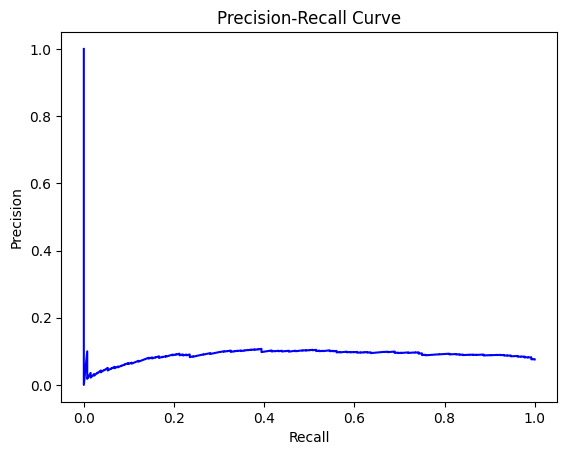

In [ ]:
#Area under the precision recall curve
import matplotlib.pyplot as plt
precision, recall, th = precision_recall_curve(Y_test, recon_error)
plt.plot(recall, precision, 'b')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
threshold = 0.00001
Y_pred = [0 if e > threshold else 0 for e in recon_error]
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

[[1602    0]
 [ 132    0]]


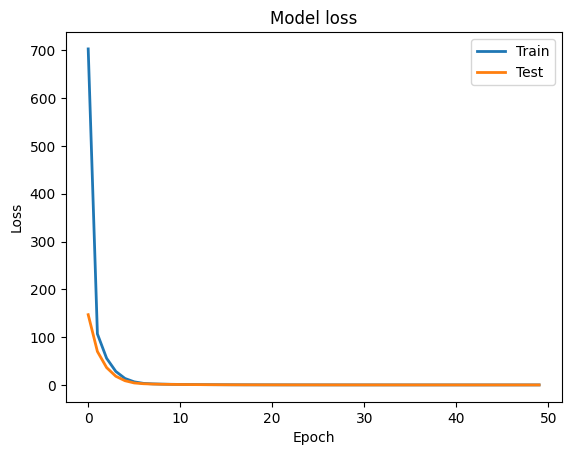

In [ ]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [ ]:
error_df['pred'] =Y_pred

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))

 Accuracy:  0.9238754325259516
 Recall:  0.0
 Precision:  0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
